In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import data_reader
import matplotlib.patches as mpatches
import os
###################################
%matplotlib inline
#set precision for displaying float-point values in the notebook
pd.options.display.float_format = '{:,.3f}'.format

#set figure dpi to 100 to get reasonably sized figures displayed in the notebook
plt.rc('figure', dpi=100)

#set savefig dpi to 300 to get high-quality images to insert in the paper
plt.rc('savefig', dpi=300)

#set to 'pdf' or 'eps' for vector figures or to 'png'
plt.rc('savefig', format='png')

#set font sizes for figures throughout
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=10)
plt.rc('figure', figsize=(9,8))


# subplot default params: 

# left : 0.125
# The left side of the subplots of the figure
# right : 0.9
# The right side of the subplots of the figure
# bottom : 0.1
# The bottom of the subplots of the figure
# top : 0.9
# The top of the subplots of the figure
# wspace : 0.2
# The amount of width reserved for blank space between subplots, expressed as a fraction of the average axis width
# hspace : 0.2
# The amount of height reserved for white space between subplots, expressed as a fraction of the average axis height


In [2]:
dr = data_reader.DataReader()

# if Exp1 and Exp2 data need to be plotted alongside each other, read those data into separate dataframes
choices_1,dynamics_1 = dr.get_data(path='../../data/experimental_data/exp1/', stim_viewing=False)

choices_1.reset_index(inplace=True)


In [110]:
def plot_figure_1():
    fig1b = pd.read_csv('../../figures_output/Fig1_b.txt', sep=',')
    fig1c = pd.read_csv('../../figures_output/Fig1_c.txt', sep=',')

    fig1d1 = pd.read_csv('../../figures_output/Fig1_d1.txt', sep=',')
    fig1d2 = pd.read_csv('../../figures_output/Fig1_d2.txt', sep=',')

    fig_neural, ax_neural = plt.subplots(5, 1,sharex=True, sharey=True)

    ax_neural[0].plot(fig1b.y_1, label='Left, 3.2%', color='blue',linestyle='dashed')
    ax_neural[0].plot(fig1b.y_2, label='Right, 3.2%', color='orange',linestyle='dashed')
    ax_neural[0].plot(fig1b.y_1_25, label='Left, 25.6%', color='blue',linestyle='solid')
    ax_neural[0].plot(fig1b.y_2_25, label='Right, 25.6%', color='orange',linestyle='solid')
    ax_neural[0].set_title('Sensorimotor 1')
    ax_neural[0].legend()
    
    ax_neural[1].plot(fig1b.y_mc_lu, label='Low, 3.2%',color='green',linestyle='dashed')
    ax_neural[1].plot(fig1b.y_mc_hu, label= 'High, 3.2%',color='red',linestyle='dashed')
    ax_neural[1].plot(fig1b.y_mc_lu_25, label='Low, 25.6%',color='green',linestyle='solid')
    ax_neural[1].plot(fig1b.y_mc_hu_25, label='High, 25.6%',color='red',linestyle='solid')
    ax_neural[1].set_title('Uncertainty')
    ax_neural[1].legend()
    
    ax_neural[2].plot(fig1b.y_7,color='blue',linestyle='dashed')
    ax_neural[2].plot(fig1b.y_8,color='orange',linestyle='dashed')
    ax_neural[2].plot(fig1b.y_7_25,color='blue',linestyle='solid')
    ax_neural[2].plot(fig1b.y_8_25,color='orange',linestyle='solid')
    ax_neural[2].set_title('Sensorimotor 2')

    ax_neural[3].plot(fig1b.y_3,color='blue',linestyle='dashed')
    ax_neural[3].plot(fig1b.y_4,color='orange',linestyle='dashed')
    ax_neural[3].plot(fig1b.y_3_25,color='blue',linestyle='solid')
    ax_neural[3].plot(fig1b.y_4_25,color='orange',linestyle='solid')
    ax_neural[3].set_title('Eye')
    
    
    ax_neural[4].plot(fig1b.y_5,color='blue',linestyle='dashed')
    ax_neural[4].plot(fig1b.y_6,color='orange',linestyle='dashed')
    ax_neural[4].plot(fig1b.y_5_25,color='blue',linestyle='solid')
    ax_neural[4].plot(fig1b.y_6_25,color='orange',linestyle='solid')
    ax_neural[4].set_title('Hand')
    
    fig_neural.text(0.5, 0.0005, 'Time (ms)', ha='center',fontsize=18)
    fig_neural.text(0.0005, 0.5, 'Firing rate (Hz)', va='center', rotation='vertical',fontsize=18)
    
    plt.tight_layout()

    figure_x_pattern= plt.figure()
    axes_x_pattern  = figure_x_pattern.gca()

    correct= axes_x_pattern.errorbar(x=[0,1,2,3,4,5], y=fig1c.x_correct, yerr=fig1c.x_correct_sem, label='Correct')
    error = axes_x_pattern.errorbar(x=[0,1,2,3,4,5], y=fig1c.x_error, yerr=fig1c.x_error_sem, label='Error')
    
    plt.xticks(np.arange(6), ('0', '3.2', '6.4', '12.8', '25.6','51.2'))
    
    plt.legend(handles=[correct, error])
    plt.xlabel('Coherence level c')
    plt.ylabel('Uncertainty')
    figure_uncertainty_accuracy = plt.figure()
    axes_uncertainty_accuracy = figure_uncertainty_accuracy.gca()
    
    plt.xlabel('Unvertainty')
    plt.ylabel('Accuracy')
    plt.xticks(np.arange(6), ('0', '3.2', '6.4', '12.8', '25.6','51.2'))
    axes_uncertainty_accuracy.plot(fig1d1.x_fit, fig1d1.y_fit)
    axes_uncertainty_accuracy.scatter(fig1d2.x_real, fig1d2.y_real)

In [16]:

def plot_figure_2():
    fig2a1 = pd.read_csv('../../figures_output/Fig2_a1.txt', sep=',')
    fig2a2 = pd.read_csv('../../figures_output/Fig2_a2.txt', sep=',')

    fig2b1 = pd.read_csv('../../figures_output/Fig2_b1.txt', sep=',')
    fig2b2 = pd.read_csv('../../figures_output/Fig2_b2.txt', sep=',')

    fig2c = pd.read_csv('../../figures_output/Fig2_c.txt', sep=',')
    fig2d = pd.read_csv('../../figures_output/Fig2_d.txt', sep=',')

    choices = pd.read_csv('../../data/experimental_data/exp1/choices.txt')

    figure_psychometric = plt.figure()
    axes_psychometric = figure_psychometric.gca()

    axes_psychometric.plot(fig2a1.pcorrect_x_fit, fig2a1.pcorrect_y_fit,label='non-com')
    axes_psychometric.scatter(fig2a2.pcorrect_x_real, fig2a2.pcorrect_y_real, label = None)

    axes_psychometric.plot(fig2b1.pcorrect_com_x_fit, fig2b1.pcorrect_com_y_fit,label='com')
    axes_psychometric.scatter(fig2b2.pcorrect_x_real, fig2b2.pcorrect_y_real, label = None)
    
    plt.legend()
    plt.xlabel('Coherence level c')
    plt.ylabel('Accuracy')
#     plt.xticks(np.arange(6), ('0', '3.2', '6.4', '12.8', '25.6','51.2'))
    figure_hand_z = plt.figure()
    axes_hand_z = figure_hand_z.gca()


    axes_hand_z.errorbar(x=[0,1,2,3,4,5], y=fig2c.init_z_correct, yerr=fig2c.init_z_correct_sem,label='Correct')
    axes_hand_z.errorbar(x=[0,1,2,3,4,5], y=fig2c.init_z_error, yerr=fig2c.init_z_error_sem, label='Error')

    plt.xlabel('Coherence level c')
    plt.ylabel('Initiation time z-score')
    plt.xticks(np.arange(6), ('0', '3.2', '6.4', '12.8', '25.6','51.2'))
    
    plt.legend()
    figure_eye_z = plt.figure()
    axes_eye_z = figure_eye_z.gca()
    
    plt.xlabel('Coherence level c')
    plt.ylabel('Eye initiation time z-score')
    plt.xticks(np.arange(6), ('0', '3.2', '6.4', '12.8', '25.6','51.2'))
    axes_eye_z.errorbar(x=[0,1,2,3,4,5], y=fig2d.eye_init_z_correct, yerr=fig2d.eye_init_z_correct_sem,label='Correct')
    axes_eye_z.errorbar(x=[0,1,2,3,4,5], y=fig2d.eye_init_z_error, yerr=fig2d.eye_init_z_error_sem,label='Error')
    plt.legend()


In [14]:
def plot_figure_3():
    fig3ab = pd.read_csv('../../figures_output/Fig3_ab.txt', sep=',')
    fig3c = pd.read_csv('../../figures_output/Fig3_c.txt', sep=',')

    figure_pcom = plt.figure()
    axes_pcom = figure_pcom.gca()

    axes_pcom.plot(fig3ab.p_com_all, label='All')
    axes_pcom.plot(fig3ab.p_com_correct,label='Correct')
    axes_pcom.plot(fig3ab.pcom_incorrect, label='Error')
    plt.legend()
    axes_pcom.scatter( [0, 1, 2, 3, 4, 5],fig3ab.p_com_all, label = None)
    axes_pcom.scatter([0, 1, 2, 3, 4, 5], fig3ab.p_com_correct, label = None )
    axes_pcom.scatter( [0, 1, 2, 3, 4, 5],fig3ab.pcom_incorrect, label = None)
    
    
   
    plt.xlabel('Coherence level c')
    plt.ylabel('Probability of change')
    plt.xticks(np.arange(6), ('0', '3.2', '6.4', '12.8', '25.6','51.2'))
    


    figure_lag_dist = plt.figure()
    axes_lag_dist = figure_lag_dist.gca()

    sns.distplot(fig3c.lag)
    
    plt.ylabel('pdf')

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


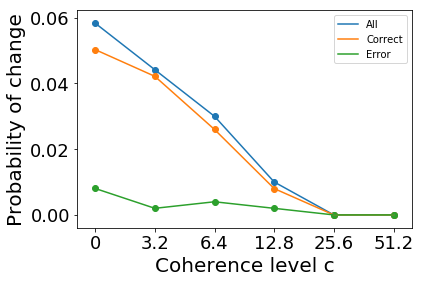

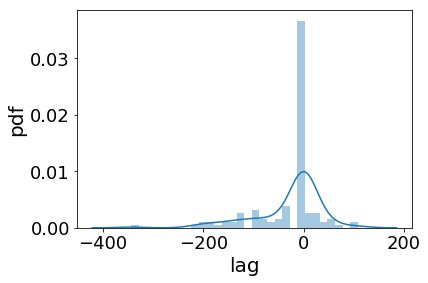

In [15]:
plot_figure_3()

In [20]:
import matplotlib.lines as mlines


def plot_mouse_IT_Z(choices, exp, var, estimator=np.mean):
    plt.figure()

    ax = sns.pointplot(data=choices[(choices.coherence > 0) & (~choices.is_correct)],
                       x='coherence', y=var, linestyles=['--'], color='grey',
                       markers=['x'], scale=1.0, errwidth=0.5, estimator=estimator)

    sns.pointplot(data=choices[(choices.coherence > 0) & (choices.is_correct)],
                       x='coherence', y=var, linestyles=['-'], color='grey',
                       scale=1.0, errwidth=0.5, estimator=estimator, ax=ax)

    #     ax.set_ylim([0, 1.2])
    ax.set_xlabel('Coherence')
    ax.set_ylabel(var)
    fig2c = pd.read_csv('../../figures_output/Fig2_c.txt', sep=',')


    correct_line = mlines.Line2D([], [], color='grey', marker='o', lw=3.0, label='Exp1, correct')
    error_line = mlines.Line2D([], [], color='grey', marker='x', ls='--', lw=3.0, label='Exp1, error')
    

    model_correct = ax.errorbar(x=[0,1,2,3,4], y=fig2c.init_z_correct[1::], yerr=fig2c.init_z_correct_sem[1::], label='Model, correct')
    model_error = ax.errorbar(x=[0,1,2,3,4], y=fig2c.init_z_error[1::], yerr=fig2c.init_z_error_sem[1::], label='Model, error')
    
    plt.legend(handles=[correct_line, error_line, model_correct, model_error])

    plt.title(exp)
    plt.tight_layout()


In [21]:
def plot_eye_IT_Z(choices, exp, var, estimator=np.mean):
    plt.figure()

    ax = sns.pointplot(data=choices[(choices.coherence > 0) & (~choices.is_correct)],
                       x='coherence', y=var, linestyles=['--'], color='grey',
                       markers=['x'], scale=1.0, errwidth=0.5, estimator=estimator,label='Correct trials')

    sns.pointplot(data=choices[(choices.coherence > 0) & (choices.is_correct)],
                       x='coherence', y=var, linestyles=['-'], color='grey',
                       scale=1.0, errwidth=0.5, estimator=estimator, ax=ax,label='Error trials')

    #     ax.set_ylim([0, 1.2])
    ax.set_xlabel('Coherence')
    ax.set_ylabel(var)
    fig2d = pd.read_csv('../../figures_output/fig2_d.txt', sep=',')
    
    

    correct_line = mlines.Line2D([], [], color='grey', marker='o', lw=3.0, label='Exp1, correct')
    error_line = mlines.Line2D([], [], color='grey', marker='x', ls='--', lw=3.0, label='Exp1, error')

    
    model_correct = ax.errorbar(x=[0, 1, 2, 3, 4], y=fig2d.eye_init_z_correct[1::], yerr=fig2d.eye_init_z_correct_sem[1::], label='Model, correct')
    model_incorrect = ax.errorbar(x=[0, 1, 2, 3, 4], y=fig2d.eye_init_z_error[1::], yerr=fig2d.eye_init_z_error_sem[1::], label='Model, error')
    
    plt.legend(handles=[correct_line, error_line, model_correct, model_incorrect])
    
    plt.title(exp)
    plt.tight_layout()

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


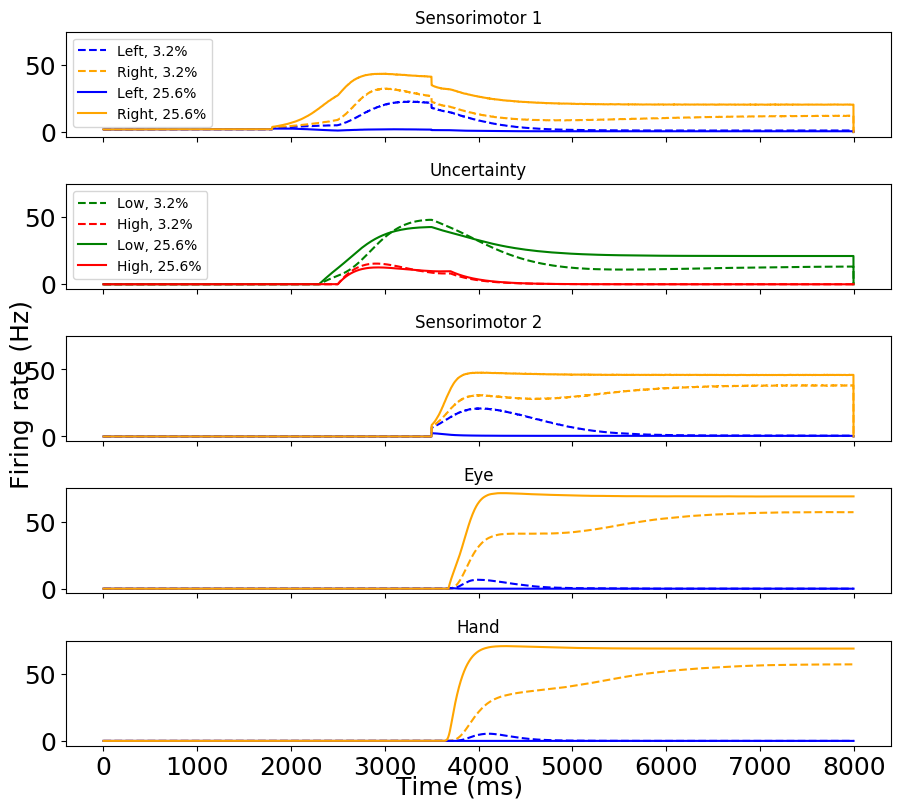

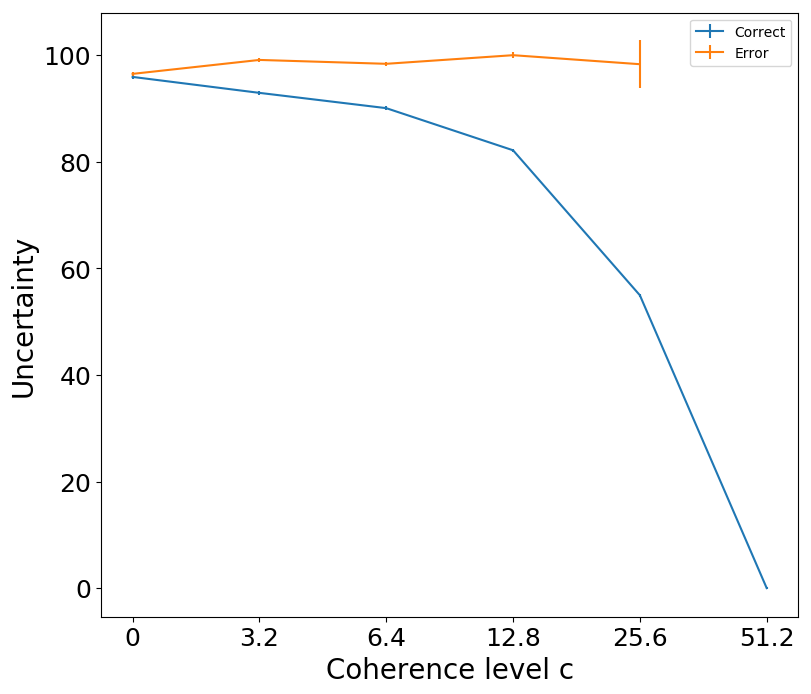

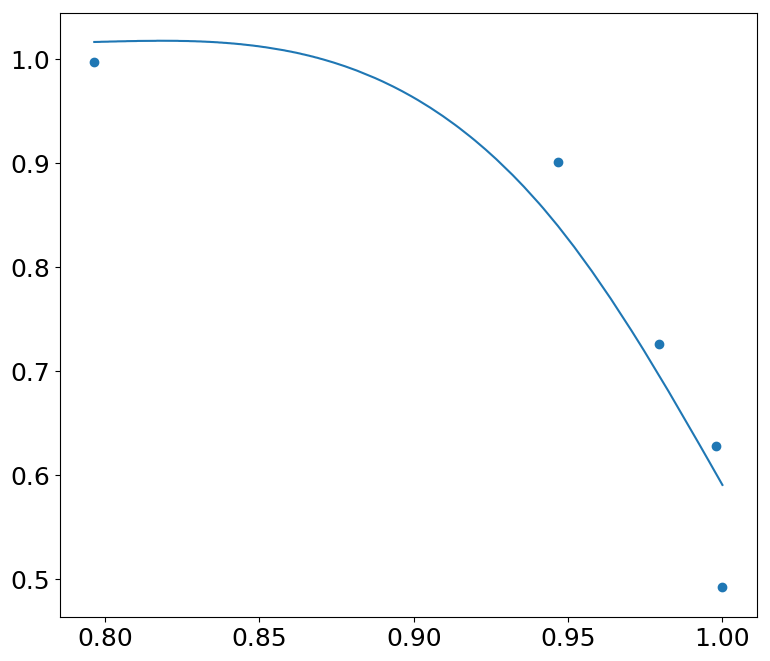

In [109]:
plot_figure_1()

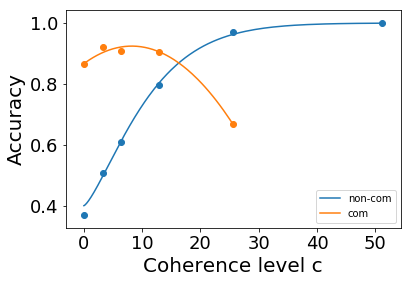

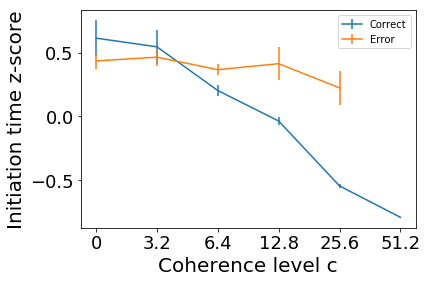

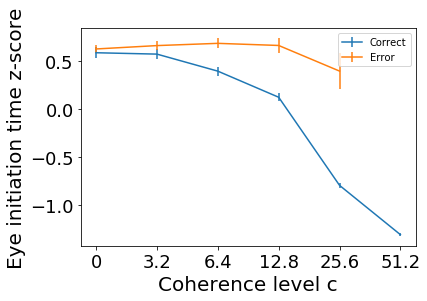

In [17]:
plot_figure_2()

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


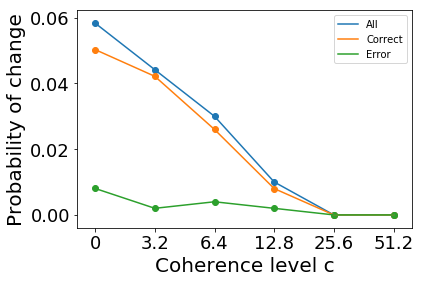

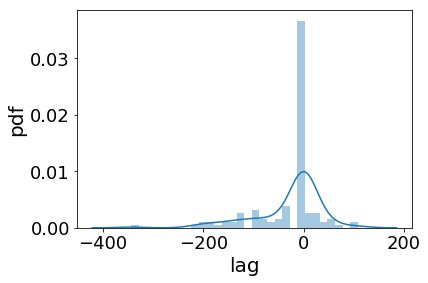

In [18]:
plot_figure_3()

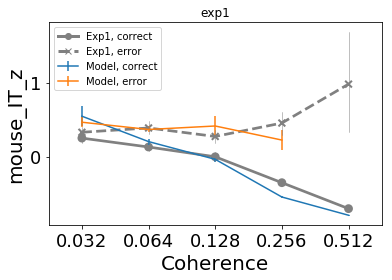

In [22]:
plot_mouse_IT_Z(choices_1, 'exp1', var='mouse_IT_z')

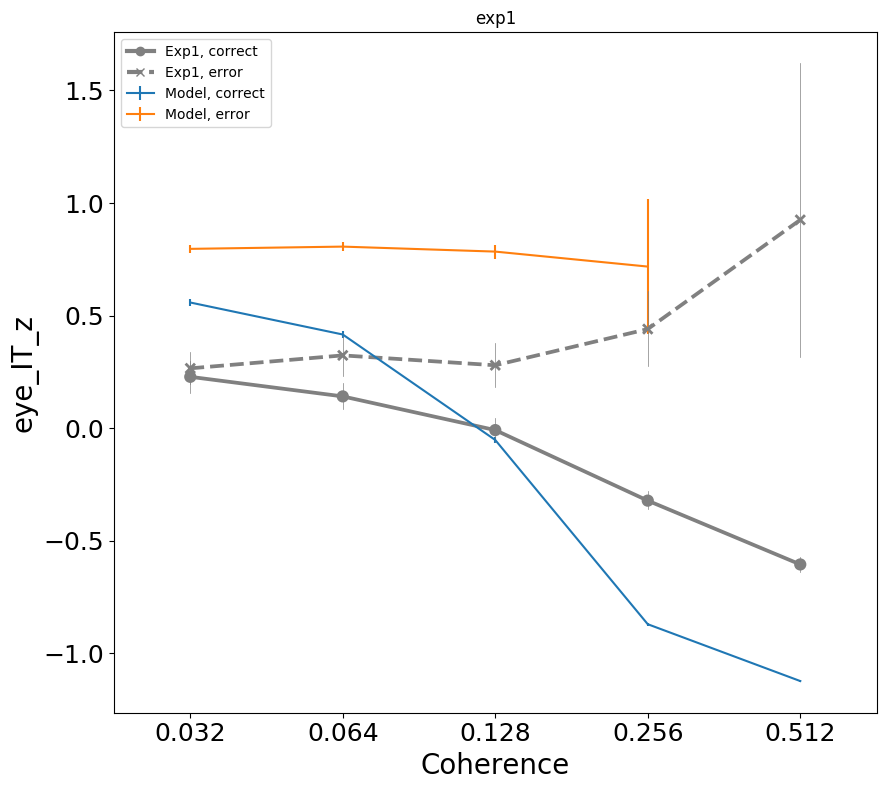

In [145]:
plot_eye_IT_Z(choices_1, 'exp1', var='eye_IT_z')